In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree, svm, naive_bayes,neighbors
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, precision_recall_curve  ###计算roc和auc
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [11]:
df_se1_stat = pd.read_csv('2016_se1_stat_features.csv', index_col=0)
df_se1_stat.head()

,MASKED_STUDENT_ID,workday,weekend,morning,afternoon,evening,overnight,workday_ExamMonth,weekend_ExamMonth,morning_ExamMonth,...,forteenth_weekgroup,forteenth_weekdb,forteenth_weekmyinfo,forteenth_weekcourse,forteenth_weekjournal,forteenth_weekemail,forteenth_weekstaff,forteenth_weekannoucements,forteenth_weekcontent,forteenth_weekgrade
0,8TMIKVZ5,25,0,0,25,0,0,0,0,0,...,9.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,187.0,1.0
1,N2YYKTMZ,61,3,1,45,18,0,5,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,21.0,2.0
2,BZRW4GD3,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0
3,HJTBF62Q,14,21,1,26,8,0,4,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33XUIDIG,20,5,0,16,9,0,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
## history gpa:
at_risk_2015 = pd.read_csv('Std_list_normal_2015_se1.csv')
normal_2015 = pd.read_csv('Std_list_atRist_2015_se1.csv')
at_risk_2015.columns = ['MASKED_STUDENT_ID', '2015_se1_CUM_GPA']
normal_2015.columns = ['MASKED_STUDENT_ID', '2015_se1_CUM_GPA']
his_2015_se1 = pd.concat([at_risk_2015, normal_2015])

his_2015_se1['2015_at_risk_se1'] = his_2015_se1['2015_se1_CUM_GPA'].apply(lambda x: 1 if x < 2.0 else -1).fillna(0)

at_risk_2015 = pd.read_csv('Std_list_normal_2015_se2.csv')
normal_2015 = pd.read_csv('Std_list_atRist_2015_se2.csv')
at_risk_2015.columns = ['MASKED_STUDENT_ID', '2015_se2_CUM_GPA']
normal_2015.columns = ['MASKED_STUDENT_ID', '2015_se2_CUM_GPA']
his_2015_se2 = pd.concat([at_risk_2015, normal_2015])
his_2015_se2['2015_at_risk_se2'] = his_2015_se2['2015_se2_CUM_GPA'].apply(lambda x: 1 if x < 2.0 else -1).fillna(0)

his_2015 = pd.merge(his_2015_se1, his_2015_se2, on='MASKED_STUDENT_ID', how='left').fillna(0)
his_2015.head()

,MASKED_STUDENT_ID,2015_se1_CUM_GPA,2015_at_risk_se1,2015_se2_CUM_GPA,2015_at_risk_se2
0,TNND4TTX,3.10,-1,0.00,0.0
1,2CRLLUNY,2.69,-1,2.81,-1.0
2,DSDPNLSC,3.15,-1,3.04,-1.0
3,G8LUICJE,2.80,-1,2.87,-1.0
4,CQK4ZMHC,2.57,-1,2.48,-1.0


In [13]:
df_se1_stat = pd.merge(df_se1_stat, his_2015, on='MASKED_STUDENT_ID', how='left').fillna(0)
df_se1_stat.head()

,MASKED_STUDENT_ID,workday,weekend,morning,afternoon,evening,overnight,workday_ExamMonth,weekend_ExamMonth,morning_ExamMonth,...,forteenth_weekjournal,forteenth_weekemail,forteenth_weekstaff,forteenth_weekannoucements,forteenth_weekcontent,forteenth_weekgrade,2015_se1_CUM_GPA,2015_at_risk_se1,2015_se2_CUM_GPA,2015_at_risk_se2
0,8TMIKVZ5,25,0,0,25,0,0,0,0,0,...,0.0,0.0,0.0,4.0,187.0,1.0,3.03,-1.0,2.99,-1.0
1,N2YYKTMZ,61,3,1,45,18,0,5,0,0,...,0.0,0.0,1.0,2.0,21.0,2.0,0.00,0.0,0.00,0.0
2,BZRW4GD3,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,6.0,2.0,0.00,0.0,0.00,0.0
3,HJTBF62Q,14,21,1,26,8,0,4,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
4,33XUIDIG,20,5,0,16,9,0,3,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.0,0.00,0.0


In [20]:
def select_time(features, first_weeks):
    pre_fix_list = ['first_', 'sencond_', 'third_', 'forth_',
                    'fifth_', 'sixth_', 'seventh_', 'eighth_',
                    'nineth_', 'tenth_', 'eleventh_', 'twelfth_',
                    'thirteenth_', 'fourteenth_']
    blacklist = pre_fix_list[first_weeks:]
    feature_list = []
    for i in features:
        flag = 0
        for j in blacklist:
            if not i.startswith(j):
                pass
            else:
                flag = 1
        if flag == 0:
            feature_list.append(i)
    return feature_list
    

df_se1_features = df_se1_stat[[i for i in df_se1_stat.columns if i != 'label_atRist' and i != 'MASKED_STUDENT_ID']]
df_se1_features = df_se1_features[select_time(list(df_se1_features.columns), first_weeks=12)]
df_se1_labels = df_se1_stat['label_atRist']
labels = df_se1_labels.apply(lambda x: str(x))

In [21]:
df_se1_features.columns

Index(['workday', 'weekend', 'morning', 'afternoon', 'evening', 'overnight',
       'workday_ExamMonth', 'weekend_ExamMonth', 'morning_ExamMonth',
       'afternoon_ExamMonth',
       ...
       'forteenth_weekjournal', 'forteenth_weekemail', 'forteenth_weekstaff',
       'forteenth_weekannoucements', 'forteenth_weekcontent',
       'forteenth_weekgrade', '2015_se1_CUM_GPA', '2015_at_risk_se1',
       '2015_se2_CUM_GPA', '2015_at_risk_se2'],
      dtype='object', length=201)

In [46]:


X_train, X_test, y_train, y_test = train_test_split(
    df_se1_features, df_se1_labels, test_size=0.2, stratify=df_se1_labels)
X_resampled_smote, y_resampled_smote = X_train, y_train
# X_resampled_smote, y_resampled_smote = SMOTE(
#     random_state=0, sampling_strategy='auto',k_neighbors=10).fit_sample(X_train, y_train)


clfs = {
        'lr': LogisticRegression(),\
        'svm': svm.SVC(class_weight='balanced'),\
        'decision_tree':tree.DecisionTreeClassifier(),\
        'naive_gaussian': naive_bayes.GaussianNB(), \
        'naive_mul':naive_bayes.MultinomialNB(),\
        'K_neighbor' : neighbors.KNeighborsClassifier(),\
        'bagging_knn' : BaggingClassifier(neighbors.KNeighborsClassifier(), max_samples=0.5,max_features=0.5),\
        'bagging_tree': BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5,max_features=0.5),\
        'random_forest' : RandomForestClassifier(n_estimators=100),\
        'balanced_rf':BalancedRandomForestClassifier(n_estimators=200, criterion = 'gini', max_features = 1.0, random_state=0),
        'adaboost':AdaBoostClassifier(n_estimators=50),\
        'gradient_boost' : GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=10, random_state=42, min_samples_leaf=1),
        'bbc' : BalancedBaggingClassifier(base_estimator=tree.DecisionTreeClassifier(),
                                ratio='auto',
                                replacement=False,
                                random_state=0)

}

def try_different_method(clf):
    # clf.fit(X_train, y_train.ravel())
    clf.fit(X_resampled_smote, y_resampled_smote.ravel())
    y_predprob = clf.predict_proba(X_test)[:,1]     
    return y_predprob

# clf_keys  = ['lr', 'svm', 'decision_tree', 'random_forest']
clf_keys  = ['gradient_boost']
roc_aucs  = []
predprobs = []
for clf_key in clf_keys:
    print('the classifier is :',clf_key)
    clf = clfs[clf_key]
    y_predprob = try_different_method(clf)
    fpr,tpr,threshold = roc_curve(y_test, y_predprob)
    roc_auc = auc(fpr,tpr)
    roc_aucs.append(roc_auc)
    print(roc_auc)
    predprobs.append(y_predprob)

the classifier is : gradient_boost
0.8400826446280993


In [47]:
predprob = predprobs[0]
j = 0
best_f1 = 0
while j < 1:
    predictions = np.array([1 if i > j else 0 for i in predprob])
    score = f1_score(y_test, predictions, average='macro')
    if best_f1 < score:
        print('the macro F-score is :', score)
        print('current j is:', j)
        best_f1 = score
    j += 0.001

/home/wenzhy/.conda/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


the macro F-score is : 0.02392193893610324
current j is: 0
the macro F-score is : 0.44544161506428254
current j is: 0.001
the macro F-score is : 0.4984492713265843
current j is: 0.002
the macro F-score is : 0.5199686511992051
current j is: 0.003
the macro F-score is : 0.5329130831765798
current j is: 0.004
the macro F-score is : 0.5423922084194146
current j is: 0.005
the macro F-score is : 0.5467818396447376
current j is: 0.006
the macro F-score is : 0.5570616386716412
current j is: 0.007
the macro F-score is : 0.5601445371016658
current j is: 0.008
the macro F-score is : 0.5603460498113796
current j is: 0.009000000000000001
the macro F-score is : 0.5630424980272799
current j is: 0.010000000000000002
the macro F-score is : 0.571863030217052
current j is: 0.011000000000000003
the macro F-score is : 0.5776318735603088
current j is: 0.012000000000000004
the macro F-score is : 0.5828983859337734
current j is: 0.013000000000000005
the macro F-score is : 0.5869809926445315
current j is: 0.01

In [48]:
j = 0.005
predictions = np.array([1 if i > j else 0 for i in predprob])
print('Sum of predictions:', predictions.sum())
print('Sum of Y test:', y_test.sum())
pos_recall = recall_score(y_test, predictions, pos_label=1)
print('the at-risk recall is :', pos_recall)
neg_recall = recall_score(y_test, predictions, pos_label=0)
print('the normal recall is :', neg_recall)
score = f1_score(y_test, predictions, average='macro')
print('the macro F-score is :', score)
score = f1_score(y_test, predictions, average='micro')
print('the micro F-score is :', score)
score = f1_score(y_test, predictions, average='weighted')
print('the weighted F-score is :', score)
score = f1_score(y_test, predictions, average='binary')
print('the binary F-score is :', score)
score = precision_score(y_test, predictions , average='macro')
print('precision score is:', score)
print('*****************************')

Sum of predictions: 392
Sum of Y test: 76
the at-risk recall is : 0.47368421052631576
the normal recall is : 0.8823140495867768
the macro F-score is : 0.5423922084194146
the micro F-score is : 0.872299258303773
the weighted F-score is : 0.9118931161706387
the binary F-score is : 0.15384615384615385
precision score is: 0.5385355692664663
*****************************


In [92]:
## add regularity

df_se1_reg = pd.read_csv('Se1_seq_feature.csv', index_col=0)
def str_to_list(s1):
    try:
        return [float(i) for i in s1[1:-1].split(',')]
    except:
        return 0.0

for col in df_se1_reg.columns:
    if col.startswith('reg_'):
        df_se1_reg[col] = df_se1_reg[col].apply(str_to_list)

df_se1_reg = df_se1_reg[[i for i in df_se1_reg.columns if i.startswith('reg_') or i == 'MASKED_STUDENT_ID']]

def select(x, i):
    try:
        return x[i]
    except:
        return -1

for col in df_se1_reg.columns:
    if col.startswith('reg_'):
        for i in range(len(df_se1_reg[col][0])):
            df_se1_reg[col + '_' + str(i)] = df_se1_reg[col].apply(lambda x: select(x, i))

df_se1_reg.head()            

,MASKED_STUDENT_ID,reg_7_COURSE_ACCESS,reg_7_PAGE_ACCESS,reg_7_LOGIN_ATTEMPT,reg_7_SESSION_TIMEOUT,reg_7_LIB,reg_7_COURSE_ACCESS_0,reg_7_COURSE_ACCESS_1,reg_7_COURSE_ACCESS_2,reg_7_COURSE_ACCESS_3,...,reg_7_LIB_237,reg_7_LIB_238,reg_7_LIB_239,reg_7_LIB_240,reg_7_LIB_241,reg_7_LIB_242,reg_7_LIB_243,reg_7_LIB_244,reg_7_LIB_245,reg_7_LIB_246
0,8TMIKVZ5,"[87.0, 6.0, 9.0, 72.0, 2.0, 0.0, 8.0, 0.0, 5.0...","[88.0, 6.0, 8.0, 74.0, 2.0, 0.0, 8.0, 0.0, 3.0...","[88.0, 6.0, 8.0, 74.0, 2.0, 0.0, 8.0, 0.0, 3.0...","[84.0, 6.0, 10.0, 68.0, 3.0, 2.0, 4.0, 0.0, 10...","[18.0, 6.0, 8.0, 4.0, 5.0, 5.0, 0.0, 4.0, 2.0,...",87.0,6.0,9.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,OZ6FIGHH,"[35.0, 10.0, 9.0, 16.0, 5.0, 4.0, 6.0, 4.0, 0....","[34.0, 10.0, 10.0, 14.0, 5.0, 4.0, 8.0, 4.0, 0...","[35.0, 10.0, 9.0, 16.0, 5.0, 4.0, 6.0, 4.0, 0....","[34.0, 9.0, 9.0, 16.0, 5.0, 5.0, 6.0, 4.0, 0.0...","[36.0, 7.0, 7.0, 22.0, 4.0, 4.0, 10.0, 3.0, 0....",35.0,10.0,9.0,16.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
2,QSGBC7CZ,"[87.0, 9.0, 10.0, 68.0, 0.0, 0.0, 4.0, 2.0, 15...","[91.0, 10.0, 11.0, 70.0, 0.0, 2.0, 2.0, 0.0, 1...","[91.0, 10.0, 11.0, 70.0, 0.0, 2.0, 2.0, 0.0, 1...","[92.0, 12.0, 8.0, 72.0, 0.0, 2.0, 6.0, 0.0, 10...","[22.0, 8.0, 8.0, 6.0, 4.0, 3.0, 6.0, 3.0, 0.0,...",87.0,9.0,10.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,EIC4AO9Q,"[73.0, 17.0, 14.0, 42.0, 3.0, 0.0, 16.0, 0.0, ...","[73.0, 17.0, 14.0, 42.0, 4.0, 0.0, 14.0, 3.0, ...","[75.0, 16.0, 15.0, 44.0, 4.0, 0.0, 14.0, 2.0, ...","[71.0, 15.0, 16.0, 40.0, 4.0, 4.0, 16.0, 0.0, ...","[42.0, 11.0, 13.0, 18.0, 7.0, 4.0, 8.0, 5.0, 6...",73.0,17.0,14.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,S9BIH11O,"[102.0, 3.0, 5.0, 94.0, 2.0, 0.0, 2.0, 0.0, 4....","[107.0, 7.0, 4.0, 96.0, 0.0, 0.0, 2.0, 0.0, 8....","[107.0, 7.0, 4.0, 96.0, 0.0, 0.0, 2.0, 0.0, 8....","[103.0, 9.0, 4.0, 90.0, 2.0, 0.0, 6.0, 0.0, 9....","[106.0, 8.0, 6.0, 92.0, 2.0, 0.0, 8.0, 0.0, 2....",102.0,3.0,5.0,94.0,...,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0


In [93]:
blacklist = ['reg_7_COURSE_ACCESS', 'reg_7_PAGE_ACCESS', 'reg_7_LOGIN_ATTEMPT', 'reg_7_SESSION_TIMEOUT', 'reg_7_LIB']
df_se1_reg = df_se1_reg[[i for i in df_se1_reg if i not in blacklist]]

In [94]:
df_se1_stat_reg = pd.merge(df_se1_stat, df_se1_reg, on='MASKED_STUDENT_ID', how='right')

In [95]:
def select_time(features, first_weeks):
    pre_fix_list = ['first_', 'sencond_', 'third_', 'forth_',
                    'fifth_', 'sixth_', 'seventh_', 'eighth_',
                    'nineth_', 'tenth_', 'eleventh_', 'twelfth_',
                    'thirteenth_', 'fourteenth_']
    blacklist = pre_fix_list[first_weeks:]
    feature_list = []
    for i in features:
        flag = 0
        for j in blacklist:
            if not i.startswith(j):
                pass
            else:
                flag = 1
        if flag == 0:
            feature_list.append(i)
    return feature_list
    

df_se1_features = df_se1_stat_reg[[i for i in df_se1_stat_reg.columns if i != 'label_atRist' and i != 'MASKED_STUDENT_ID']]
df_se1_features = df_se1_features[select_time(list(df_se1_features.columns), first_weeks=12)]
df_se1_labels = df_se1_stat_reg['label_atRist']
labels = df_se1_labels.apply(lambda x: str(x))

In [135]:
import time

X_train, X_test, y_train, y_test = train_test_split(
    df_se1_features, df_se1_labels, test_size=0.2, stratify=df_se1_labels)
# X_resampled_smote, y_resampled_smote = X_train, y_train

X_resampled_smote, y_resampled_smote = SMOTE(
     random_state=0, sampling_strategy='auto',k_neighbors=10).fit_sample(X_train, y_train)

clfs = {
        'lr': LogisticRegression(),\
        'svm': svm.SVC(class_weight='balanced'),\
        'decision_tree':tree.DecisionTreeClassifier(),\
        'naive_gaussian': naive_bayes.GaussianNB(), \
        'naive_mul':naive_bayes.MultinomialNB(),\
        'K_neighbor' : neighbors.KNeighborsClassifier(),\
        'bagging_knn' : BaggingClassifier(neighbors.KNeighborsClassifier(), max_samples=0.5,max_features=0.5),\
        'bagging_tree': BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5,max_features=0.5),\
        'random_forest' : RandomForestClassifier(n_estimators=100),\
        'balanced_rf':BalancedRandomForestClassifier(n_estimators=200, criterion = 'gini', max_features = 1.0, random_state=0),
        'adaboost':AdaBoostClassifier(n_estimators=50),\
        'gradient_boost' : GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=10, random_state=42, min_samples_leaf=1),
        'bbc' : BalancedBaggingClassifier(base_estimator=tree.DecisionTreeClassifier(),
                                ratio='auto',
                                replacement=False,
                                random_state=0)

}

def try_different_method(clf, X_test):
    # clf.fit(X_train, y_train.ravel())
#     start = time.now()
    print(X_resampled_smote.shape)
    clf.fit(X_resampled_smote, y_resampled_smote.ravel())
    X_train = X_resampled_smote[:, clf.feature_importances_>0.001]
    print(X_train.shape)
    print(X_test.shape)
    print(X_train)
    print(X_test.values)
    X_test  = X_test.values[:, clf.feature_importances_>0.001]
    clf.fit(X_train, y_resampled_smote.ravel())
    y_predprob = clf.predict_proba(X_test)[:,1]     
    return y_predprob

# clf_keys  = ['lr', 'svm', 'decision_tree', 'random_forest']
clf_keys  = ['gradient_boost']
roc_aucs  = []
predprobs = []
for clf_key in clf_keys:
    print('the classifier is :',clf_key)
    clf = clfs[clf_key]
    y_predprob = try_different_method(clf, X_test)
    fpr,tpr,threshold = roc_curve(y_test, y_predprob)
    roc_auc = auc(fpr,tpr)
    roc_aucs.append(roc_auc)
    print(roc_auc)
    predprobs.append(y_predprob)

the classifier is : gradient_boost
(22590, 1436)
(22590, 77)
(2901, 1436)
[[ 3.         3.         0.        ...  2.         0.         0.       ]
 [ 0.         0.        13.        ...  0.         0.         0.       ]
 [ 0.         0.         2.        ...  0.         0.         0.       ]
 ...
 [ 0.         0.         0.3895849 ...  2.3895849  0.         0.       ]
 [ 1.1006904  0.         0.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         0.         0.       ]]
[[51.  4.  6. ...  0.  0.  0.]
 [ 5.  0.  0. ...  0.  0.  0.]
 [16.  0.  2. ...  0.  0.  0.]
 ...
 [45.  0.  5. ...  0.  0.  0.]
 [22.  0.  9. ...  0.  0.  0.]
 [94.  7. 31. ...  0.  0.  7.]]
0.8593619003260362


In [136]:
predprob = predprobs[0]
j = 0
best_f1 = 0
while j < 1:
    predictions = np.array([1 if i > j else 0 for i in predprob])
    score = f1_score(y_test, predictions, average='macro')
    if best_f1 < score:
        print('the macro F-score is :', score)
        print('current j is:', j)
        best_f1 = score
    j += 0.001

/home/wenzhy/.conda/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


the macro F-score is : 0.025529056096741685
current j is: 0
the macro F-score is : 0.49183027145689984
current j is: 0.001
the macro F-score is : 0.5189871101262369
current j is: 0.002
the macro F-score is : 0.5339652952118319
current j is: 0.003
the macro F-score is : 0.54161926431551
current j is: 0.004
the macro F-score is : 0.5517212215822078
current j is: 0.005
the macro F-score is : 0.5579476685968044
current j is: 0.006
the macro F-score is : 0.5589844937671025
current j is: 0.009000000000000001
the macro F-score is : 0.5625094254260293
current j is: 0.010000000000000002
the macro F-score is : 0.5629601551223922
current j is: 0.011000000000000003
the macro F-score is : 0.5644866388524157
current j is: 0.012000000000000004
the macro F-score is : 0.5649109124722539
current j is: 0.013000000000000005
the macro F-score is : 0.5660802492772491
current j is: 0.014000000000000005
the macro F-score is : 0.5692908381477295
current j is: 0.017000000000000008
the macro F-score is : 0.57010

In [137]:
j = 0.0050
predictions = np.array([1 if i > j else 0 for i in predprob])
print('Sum of predictions:', predictions.sum())
print('Sum of Y test:', y_test.sum())
pos_recall = recall_score(y_test, predictions, pos_label=1)
print('the at-risk recall is :', pos_recall)
# neg_recall = recall_score(y_test, predictions, pos_label=0)
# print('the normal recall is :', neg_recall)
score = f1_score(y_test, predictions, average='macro')
print('the macro F-score is :', score)
score = f1_score(y_test, predictions, average='micro')
print('the micro F-score is :', score)
# score = f1_score(y_test, predictions, average='weighted')
# print('the weighted F-score is :', score)
# score = f1_score(y_test, predictions, average='binary')
# print('the binary F-score is :', score)
score = precision_score(y_test, predictions , average='macro')
print('precision score is:', score)
print('*****************************')

Sum of predictions: 399
Sum of Y test: 76
the at-risk recall is : 0.5526315789473685
the macro F-score is : 0.5517212215822078
the micro F-score is : 0.865218890037918
precision score is: 0.5458370145988473
*****************************


In [142]:
## add social homophily

df_se1_soho = pd.read_csv('se1_weekly_node_embeddings.csv', index_col = 0)
df_se1_soho = df_se1_soho[[i for i in df_se1_soho.columns if i != 'label_atRist']]
# df_se1_soho.head()

def str_to_list(s1):
    try:
        return [float(i) for i in s1[1:-1].split()]
    except:
        return 0.0

for col in df_se1_soho.columns:
    if col !='MASKED_STUDENT_ID':
        df_se1_soho[col] = df_se1_soho[col].apply(str_to_list)

        
for col in df_se1_soho.columns:
    if col.startswith('week_'):
        for i in range(64):
            df_se1_soho[col + '_' + str(i)] = df_se1_soho[col].apply(lambda x: select(x, i))

blacklist = ['week_1', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6', 'week_7', 'week_8', 'week_9', 'week_10', 'week_11', 'week_12']
df_se1_soho = df_se1_soho[[i for i in df_se1_soho.columns if i not in blacklist]]
print(df_se1_soho.shape)

(15503, 769)


In [143]:
df_se1_stat_reg_soho = pd.merge(df_se1_stat_reg, df_se1_soho, on='MASKED_STUDENT_ID', how='left').fillna(0)
print(df_se1_stat_reg_soho.shape)

(14501, 2219)


In [144]:
def select_time(features, first_weeks):
    pre_fix_list = ['first_', 'sencond_', 'third_', 'forth_',
                    'fifth_', 'sixth_', 'seventh_', 'eighth_',
                    'nineth_', 'tenth_', 'eleventh_', 'twelfth_',
                    'thirteenth_', 'fourteenth_']
    blacklist = pre_fix_list[first_weeks:]
    feature_list = []
    for i in features:
        flag = 0
        for j in blacklist:
            if not i.startswith(j):
                pass
            else:
                flag = 1
        if flag == 0:
            feature_list.append(i)
    return feature_list
    

df_se1_features = df_se1_stat_reg_soho[[i for i in df_se1_stat_reg_soho.columns if i != 'label_atRist' and i != 'MASKED_STUDENT_ID']]
df_se1_features = df_se1_features[select_time(list(df_se1_features.columns), first_weeks=12)]
df_se1_labels = df_se1_stat_reg_soho['label_atRist']
labels = df_se1_labels.apply(lambda x: str(x))

In [63]:
df_se1_labels.columns

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: label_atRist, dtype: float64

In [177]:
import time
start = time.time()

X_train, X_test, y_train, y_test = train_test_split(
    df_se1_features, df_se1_labels, test_size=0.2, stratify=df_se1_labels)
# X_resampled_smote, y_resampled_smote = X_train, y_train
X_resampled_smote, y_resampled_smote = SMOTE(
    random_state=0, sampling_strategy='auto',k_neighbors=10).fit_sample(X_train, y_train)


clfs = {
        'lr': LogisticRegression(),\
        'svm': svm.SVC(class_weight='balanced'),\
        'decision_tree':tree.DecisionTreeClassifier(),\
        'naive_gaussian': naive_bayes.GaussianNB(), \
        'naive_mul':naive_bayes.MultinomialNB(),\
        'K_neighbor' : neighbors.KNeighborsClassifier(),\
        'bagging_knn' : BaggingClassifier(neighbors.KNeighborsClassifier(), max_samples=0.5,max_features=0.5),\
        'bagging_tree': BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5,max_features=0.5),\
        'random_forest' : RandomForestClassifier(n_estimators=100),\
        'balanced_rf':BalancedRandomForestClassifier(n_estimators=200, criterion = 'gini', max_features = 1.0, random_state=0),
        'adaboost':AdaBoostClassifier(n_estimators=50),\
        'gradient_boost' : GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=10, random_state=42, min_samples_leaf=1),
        'bbc' : BalancedBaggingClassifier(base_estimator=tree.DecisionTreeClassifier(),
                                ratio='auto',
                                replacement=False,
                                random_state=0)

}

def try_different_method(clf, X_test, y_test):
    # clf.fit(X_train, y_train.ravel())
    clf.fit(X_resampled_smote, y_resampled_smote.ravel())
#     X_train = X_resampled_smote# [:, clf.feature_importances_]
#     print(X_train.shape)
#     print(X_test.shape)
#     print(X_train)
#     print(X_test.values)
#     X_test  = X_test.values# [:, clf.feature_importances_]
#     clf.fit(X_train, y_resampled_smote.ravel())
    clf.fit(X_test, y_test)
    y_predprob = clf.predict_proba(X_test)[:,1]     
    return y_predprob

# clf_keys  = ['lr', 'svm', 'decision_tree', 'random_forest']
clf_keys  = ['svm']
roc_aucs  = []
predprobs = []
for clf_key in clf_keys:
    print('the classifier is :',clf_key)
    clf = clfs[clf_key]
    y_predprob = try_different_method(clf, X_test, y_test)
    fpr,tpr,threshold = roc_curve(y_test, y_predprob)
    roc_auc = auc(fpr,tpr)
    roc_aucs.append(roc_auc)
    print(roc_auc)
    predprobs.append(y_predprob)

current = time.time()
print(current-start)

the classifier is : svm


/home/wenzhy/.conda/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KeyboardInterrupt: 

In [170]:
predprob = predprobs[0]
j = 0
best_f1 = 0
while j < 1:
    predictions = np.array([1 if i > j else 0 for i in predprob])
    score = f1_score(y_test, predictions, average='macro')
    if best_f1 < score:
        print('the macro F-score is :', score)
        print('current j is:', j)
        best_f1 = score
    j += 0.001

/home/wenzhy/.conda/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


the macro F-score is : 0.025529056096741685
current j is: 0
the macro F-score is : 0.039869386913045944
current j is: 0.001
the macro F-score is : 0.04092449637312595
current j is: 0.002
the macro F-score is : 0.04267835975865173
current j is: 0.003
the macro F-score is : 0.043727897558749715
current j is: 0.004
the macro F-score is : 0.04477535854473846
current j is: 0.005
the macro F-score is : 0.04512405186992782
current j is: 0.008
the macro F-score is : 0.04547251544611787
current j is: 0.009000000000000001
the macro F-score is : 0.045820749524453225
current j is: 0.011000000000000003
the macro F-score is : 0.04616875435574745
current j is: 0.012000000000000004
the macro F-score is : 0.046516530190483615
current j is: 0.01800000000000001
the macro F-score is : 0.046864077278814954
current j is: 0.022000000000000013
the macro F-score is : 0.04721139587056543
current j is: 0.026000000000000016
the macro F-score is : 0.04755848621523032
current j is: 0.02900000000000002
the macro F-s

the macro F-score is : 0.1032339899466456
current j is: 0.47300000000000036
the macro F-score is : 0.10385430738817658
current j is: 0.47500000000000037
the macro F-score is : 0.10447386943043681
current j is: 0.47600000000000037
the macro F-score is : 0.10478336767399268
current j is: 0.47700000000000037
the macro F-score is : 0.1054017995981813
current j is: 0.47800000000000037
the macro F-score is : 0.10601948009201
current j is: 0.47900000000000037
the macro F-score is : 0.1069445953581039
current j is: 0.48000000000000037
the macro F-score is : 0.10725259310858135
current j is: 0.48100000000000037
the macro F-score is : 0.10756040418441154
current j is: 0.4820000000000004
the macro F-score is : 0.10817546709720534
current j is: 0.4830000000000004
the macro F-score is : 0.10940336144981538
current j is: 0.4840000000000004
the macro F-score is : 0.11001619601413144
current j is: 0.4850000000000004
the macro F-score is : 0.11032233582495632
current j is: 0.4860000000000004
the macro 

In [175]:
j = 0.55
predictions = np.array([1 if i > j else 0 for i in predprob])
print('Sum of predictions:', predictions.sum())
print('Sum of Y test:', y_test.sum())
pos_recall = recall_score(y_test, predictions, pos_label=1)
print('the at-risk recall is :', pos_recall)
# neg_recall = recall_score(y_test, predictions, pos_label=0)
# print('the normal recall is :', neg_recall)
score = f1_score(y_test, predictions, average='macro')
print('the macro F-score is :', score)
score = f1_score(y_test, predictions, average='micro')
print('the micro F-score is :', score)
# score = f1_score(y_test, predictions, average='weighted')
# print('the weighted F-score is :', score)
# score = f1_score(y_test, predictions, average='binary')
# print('the binary F-score is :', score)
score = precision_score(y_test, predictions , average='macro')
print('precision score is:', score)
print('*****************************')

Sum of predictions: 169
Sum of Y test: 76
the at-risk recall is : 0.10526315789473684
the macro F-score is : 0.512048418431616
the micro F-score is : 0.9210617028610824
precision score is: 0.5112235438848796
*****************************


Feature ranking:
1. feature 213, (0.419514)
2. feature 85, (0.099103)
3. feature 212, (0.098023)
4. feature 59, (0.043691)
5. feature 207, (0.031869)
6. feature 107, (0.030353)
7. feature 102, (0.026030)
8. feature 82, (0.024212)
9. feature 5, (0.014468)
10. feature 146, (0.007955)
11. feature 167, (0.007539)
12. feature 76, (0.006669)
13. feature 90, (0.006603)
14. feature 17, (0.005276)
15. feature 121, (0.004925)
16. feature 98, (0.004619)
17. feature 147, (0.004449)
18. feature 81, (0.004346)
19. feature 31, (0.004255)
20. feature 20, (0.004216)


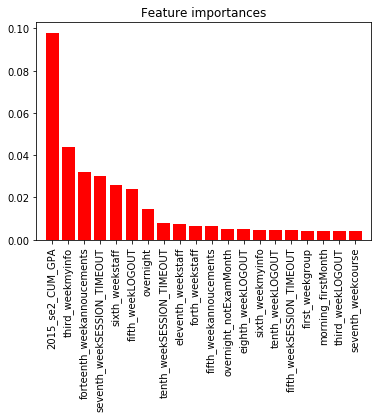

In [9]:
y_importances = clf.feature_importances_
x_importances = list(df_se1_features.columns)
y_pos = np.arange(len(x_importances))

# plt.barh(y_pos, y_importances, align='center', height=5.0)
# plt.yticks(y_pos, x_importances)
# plt.xlabel('Importances')
# plt.xlim(0,1)
# plt.title('Features Importances')
# plt.show()

X_resampled_smote, y_resampled_smote 


importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Print the feature ranking
print("Feature ranking:")
for f in range(min(20,X_resampled_smote.shape[1])):    
    print("%d. feature %d, (%f)" % (f + 1, indices[f], importances[indices[f]]))# Plot the feature importances of the forest
    

num_important = 20    
plt.figure()
plt.title("Feature importances")
plt.bar(range(num_important), importances[indices][2:num_important+2],color="r", align="center")
plt.xticks(range(num_important), [x_importances[i] for i in indices[2:num_important+2]], rotation=90)
plt.xlim([-1, num_important])
plt.show()


In [29]:
from sklearn.model_selection import KFold

clfs = {
        'lr': LogisticRegression(),\
        'svm': svm.SVC(class_weight='balanced'),\
        'decision_tree':tree.DecisionTreeClassifier(),\
        'naive_gaussian': naive_bayes.GaussianNB(), \
        'naive_mul':naive_bayes.MultinomialNB(),\
        'K_neighbor' : neighbors.KNeighborsClassifier(),\
        'bagging_knn' : BaggingClassifier(neighbors.KNeighborsClassifier(), max_samples=0.5,max_features=0.5),\
        'bagging_tree': BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5,max_features=0.5),\
        'random_forest' : RandomForestClassifier(n_estimators=100),\
        'balanced_rf':BalancedRandomForestClassifier(n_estimators=200, criterion = 'gini', max_features = 1.0, random_state=0),
        'adaboost':AdaBoostClassifier(n_estimators=50),\
        'gradient_boost' : GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=10, random_state=42, min_samples_leaf=1),
        'bbc' : BalancedBaggingClassifier(base_estimator=tree.DecisionTreeClassifier(),
                                ratio='auto',
                                replacement=False,
                                random_state=0)

}

def try_different_method(clf, X_train, y_train, X_test):
    # clf.fit(X_train, y_train.ravel())
    clf.fit(X_train, y_train)
    y_predprob = clf.predict_proba(X_test)[:,1]     
    return y_predprob

# clf_keys  = ['lr', 'svm', 'decision_tree', 'random_forest']
# clf_keys  = ['gradient_boost']
# for clf_key in clf_keys:
#     print('the classifier is :',clf_key)
#     clf = clfs[clf_key]
#     y_predprob = try_different_method(clf)
#     fpr,tpr,threshold = roc_curve(y_test, y_predprob)
#     roc_auc = auc(fpr,tpr)
#     roc_aucs.append(roc_auc)
#     print(roc_auc)
#     predprobs.append(y_predprob)


kf = KFold(n_splits=5)
for train_index, test_index in kf.split(df_se1_features):
    print('train_index', train_index, 'test_index', test_index)
    train_X, train_y = df_se1_features.iloc[train_index], df_se1_labels.iloc[train_index]
    test_X, test_y = df_se1_features.iloc[test_index], df_se1_labels.iloc[test_index]
    
    X_resampled_smote, y_resampled_smote = SMOTE(
        random_state=0, sampling_strategy='auto',k_neighbors=10).fit_sample(train_X, train_y)
    
    for clf_key in clf_keys:
        print('the classifier is :',clf_key)
        clf = clfs[clf_key]
        y_predprob = try_different_method(clf, X_resampled_smote, y_resampled_smote.ravel(), test_X)
        fpr,tpr,threshold = roc_curve(test_y, y_predprob)
        roc_auc = auc(fpr,tpr)
        print(roc_auc)
    
        predprob = y_predprob
        j = 0
        best_f1 = 0
        best_j = 0
        while j < 1:
            predictions = np.array([1 if i > j else 0 for i in predprob])
            score = f1_score(test_y, predictions, average='macro')
            if best_f1 < score:
                best_j = j
                best_f1 = score
            j += 0.001
        
        j = best_j
        predictions = np.array([1 if i > j else 0 for i in predprob])
        print('Sum of predictions:', predictions.sum())
        print('Sum of Y test:', test_y.sum())
        pos_recall = recall_score(test_y, predictions, pos_label=1)
        print('the at-risk recall is :', pos_recall)
        neg_recall = recall_score(test_y, predictions, pos_label=0)
        print('the normal recall is :', neg_recall)
        score = f1_score(test_y, predictions, average='macro')
        print('the macro F-score is :', score)
        score = f1_score(test_y, predictions, average='micro')
        print('the micro F-score is :', score)
        score = f1_score(test_y, predictions, average='weighted')
        print('the micro F-score is :', score)
        score = f1_score(test_y, predictions, average='binary')
        print('the micro F-score is :', score)
        score = precision_score(test_y, predictions , average='weighted')
        print('precision score is:', )
        print('*****************************')

train_index [ 3101  3102  3103 ... 15500 15501 15502] test_index [   0    1    2 ... 3098 3099 3100]
the classifier is : gradient_boost
0.9503288162614587


/home/wenzhy/.conda/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Sum of predictions: 15
Sum of Y test: 13
the at-risk recall is : 0.46153846153846156
the normal recall is : 0.9970854922279793
the macro F-score is : 0.7129899578879171
the micro F-score is : 0.9948403740728797
*****************************
train_index [    0     1     2 ... 15500 15501 15502] test_index [3101 3102 3103 ... 6199 6200 6201]
the classifier is : gradient_boost
0.9098140444708562


/home/wenzhy/.conda/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Sum of predictions: 38
Sum of Y test: 53
the at-risk recall is : 0.20754716981132076
the normal recall is : 0.9911417322834646
the macro F-score is : 0.615233563687172
the micro F-score is : 0.9777491131892938
*****************************
train_index [    0     1     2 ... 15500 15501 15502] test_index [6202 6203 6204 ... 9300 9301 9302]
the classifier is : gradient_boost
0.8888697152717859


/home/wenzhy/.conda/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Sum of predictions: 25
Sum of Y test: 61
the at-risk recall is : 0.16393442622950818
the normal recall is : 0.9950657894736842
the macro F-score is : 0.6108833863142045
the micro F-score is : 0.9787165430506288
*****************************
train_index [    0     1     2 ... 15500 15501 15502] test_index [ 9303  9304  9305 ... 12400 12401 12402]
the classifier is : gradient_boost
0.8617962174876613


/home/wenzhy/.conda/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Sum of predictions: 131
Sum of Y test: 98
the at-risk recall is : 0.32653061224489793
the normal recall is : 0.9670219853431046
the macro F-score is : 0.6259212101576836
the micro F-score is : 0.9467741935483871
*****************************
train_index [    0     1     2 ... 12400 12401 12402] test_index [12403 12404 12405 ... 15500 15501 15502]
the classifier is : gradient_boost
0.7653637123745819


/home/wenzhy/.conda/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Sum of predictions: 217
Sum of Y test: 156
the at-risk recall is : 0.26282051282051283
the normal recall is : 0.9402173913043478
the macro F-score is : 0.5849496036524067
the micro F-score is : 0.9061290322580645
*****************************
